In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('Copper_Set.xlsx - Result 1.csv')

C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\2537016213.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Copper_Set.xlsx - Result 1.csv')


In [4]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [5]:
df.shape

(181673, 14)

missing_values

In [6]:
Miss_value=df.isnull().sum()
print(Miss_value)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


PREPROCESSING

In [7]:
df['item_date']=pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce').dt.date
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')
df['customer']=pd.to_numeric(df['customer'],errors='coerce')
df['country']=pd.to_numeric(df['country'],errors='coerce')
df['application']=pd.to_numeric(df['application'],errors='coerce')
df['thickness']=pd.to_numeric(df['thickness'],errors='coerce')
df['width']=pd.to_numeric(df['width'],errors='coerce')
df['product_ref']=pd.to_numeric(df['product_ref'],errors='coerce')
df['delivery date']=pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce').dt.date
df['selling_price']=pd.to_numeric(df['selling_price'],errors='coerce')
df['material_ref']=df['material_ref'].str.lstrip('0')

In [8]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [10]:
df['material_ref'].fillna('missing',inplace=True)
df=df.dropna()
missingvalues=df.isnull().sum()
print(missingvalues)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\2989169040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['material_ref'].fillna('missing',inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181631 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181631 non-null  object 
 1   item_date      181631 non-null  object 
 2   quantity tons  181631 non-null  float64
 3   customer       181631 non-null  float64
 4   country        181631 non-null  float64
 5   status         181631 non-null  object 
 6   item type      181631 non-null  object 
 7   application    181631 non-null  float64
 8   thickness      181631 non-null  float64
 9   width          181631 non-null  float64
 10  material_ref   181631 non-null  object 
 11  product_ref    181631 non-null  int64  
 12  delivery date  181631 non-null  object 
 13  selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\3797590925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_date'] = pd.to_datetime(df['item_date'])


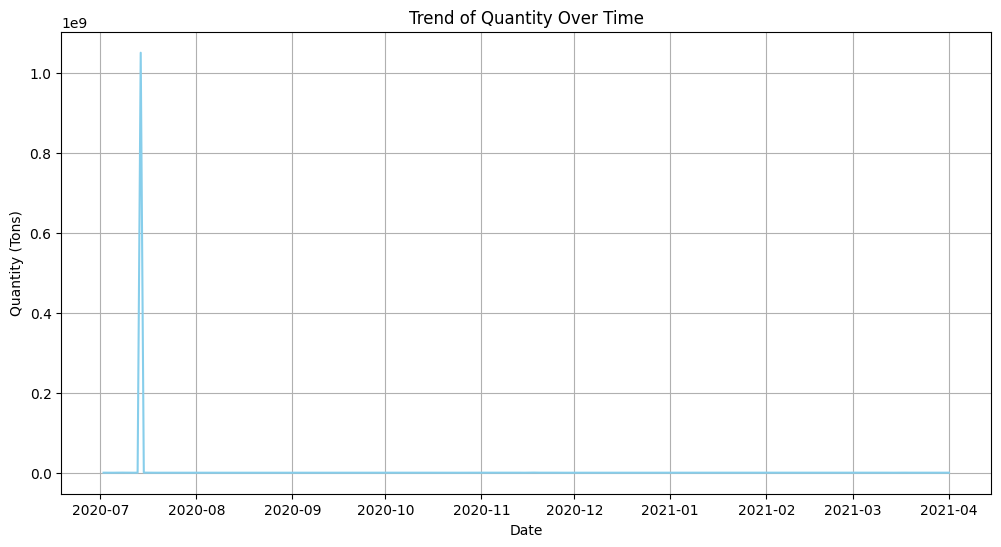

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
df['item_date'] = pd.to_datetime(df['item_date'])
quantity_over_time = df.groupby('item_date')['quantity tons'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=quantity_over_time, x='item_date', y='quantity tons', color='skyblue')
plt.title('Trend of Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity (Tons)')
plt.grid(True)
plt.show()


In [13]:
# DISTRIBUTION

In [14]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\3896180063.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity tons'],kde=True)


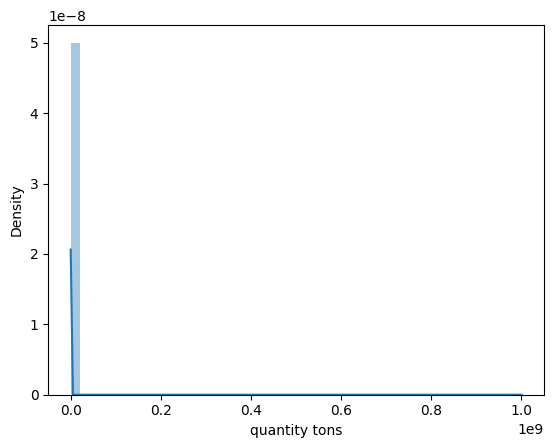

C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\3896180063.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['country'])


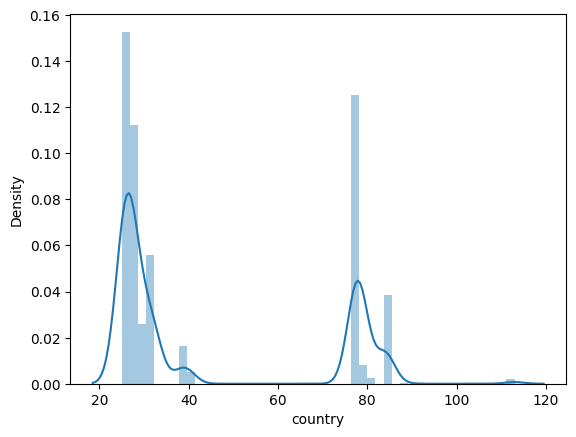

C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\3896180063.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['application'])


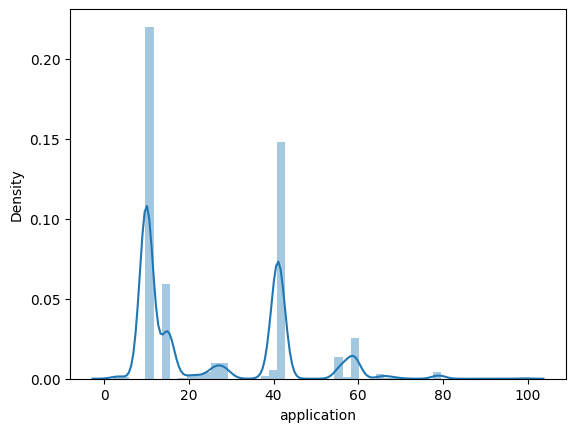

C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\3896180063.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thickness'])


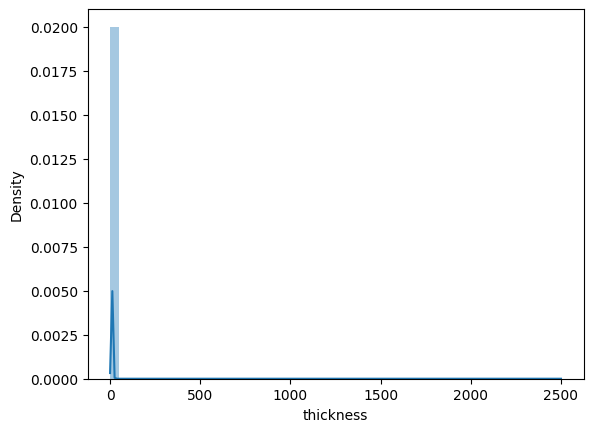

C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\3896180063.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])


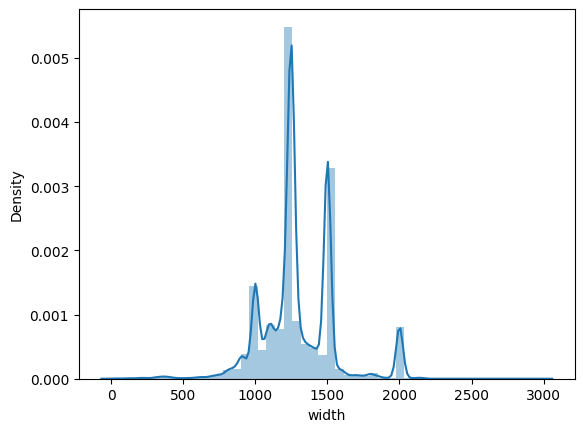

C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\3896180063.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


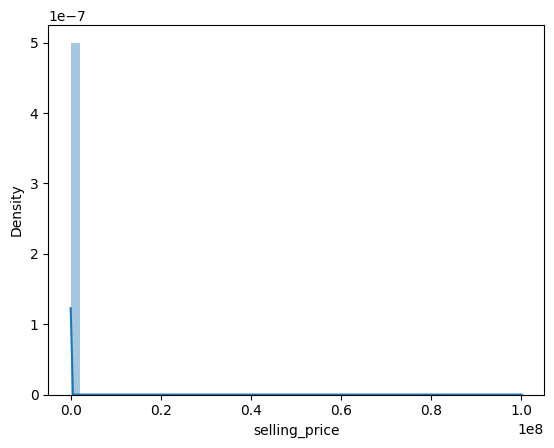

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['quantity tons'],kde=True)
plt.show()
sns.distplot(df['country'])
plt.show()
sns.distplot(df['application'])
plt.show()
sns.distplot(df['thickness'])
plt.show()
sns.distplot(df['width'])
plt.show()
sns.distplot(df['selling_price'])
plt.show()


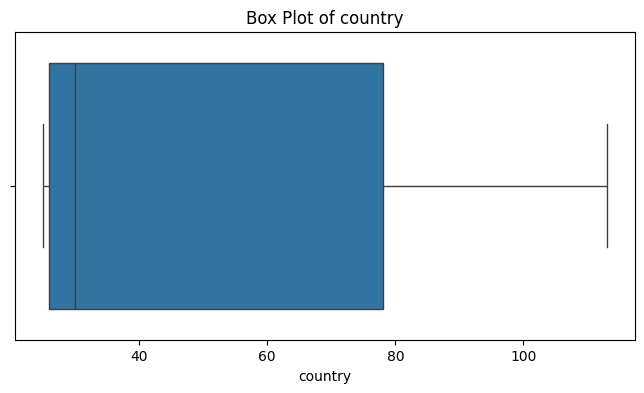

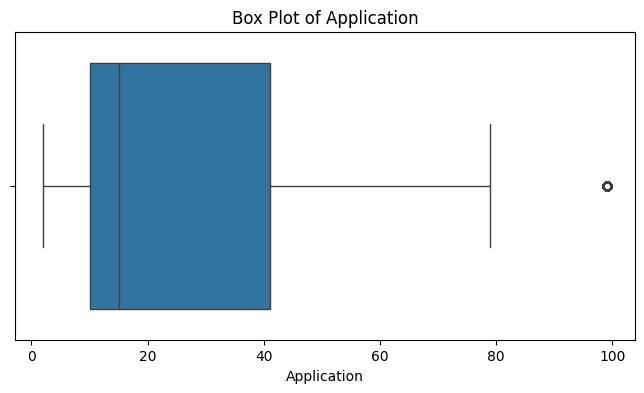

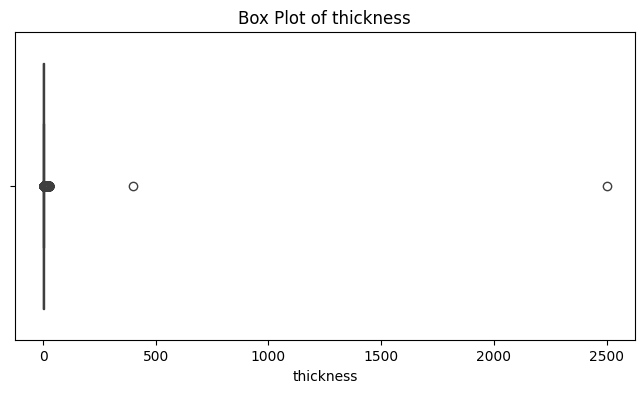

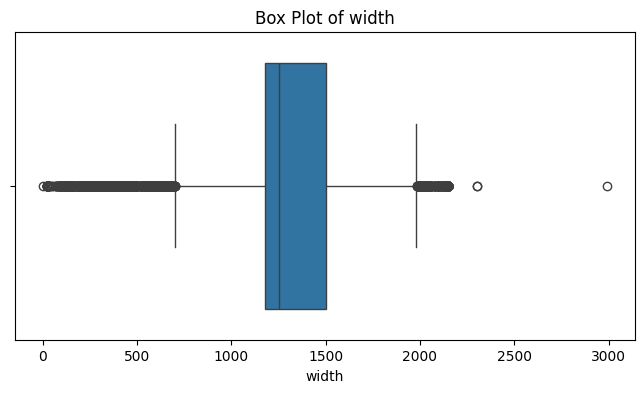

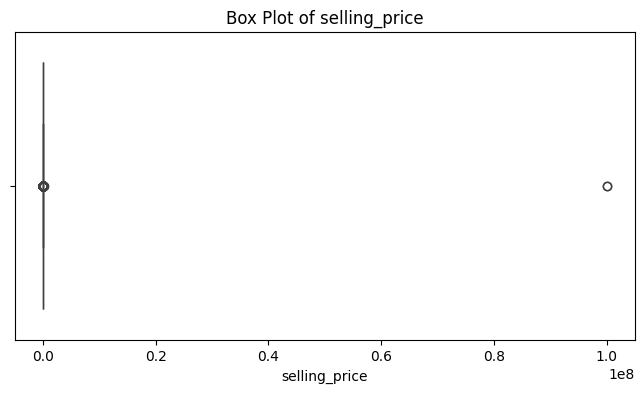

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['country'])
plt.title('Box Plot of country')
plt.xlabel('country')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['application'])
plt.title('Box Plot of Application')
plt.xlabel('Application')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['thickness'])
plt.title('Box Plot of thickness')
plt.xlabel('thickness')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['width'])
plt.title('Box Plot of width')
plt.xlabel('width')
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['selling_price'])
plt.title('Box Plot of selling_price')
plt.xlabel('selling_price')
plt.show()




In [17]:
import numpy as np
mask=df['selling_price']<=0
print(mask.sum())
import numpy as np
mask=df['thickness']<=0
print(mask.sum())
import numpy as np
mask=df['quantity tons']<=0
print(mask.sum())

7
0
4


In [18]:
# handling outliers
# qunatity tons, selling price, thickness

e:\capstone_projects\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\4035007174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_quantity_tons'] = np.log(df['quantity tons'])
C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\4035007174.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.githu

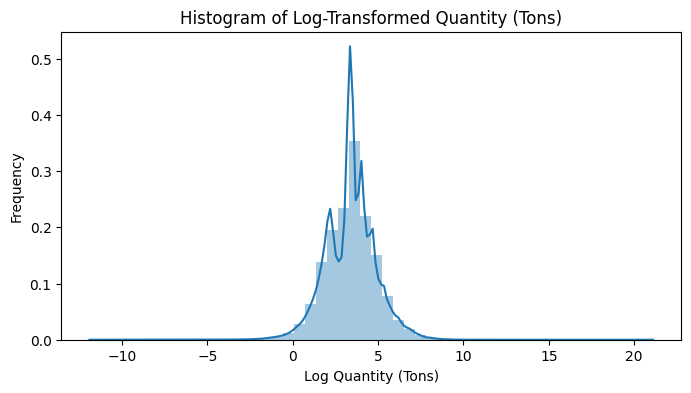

In [19]:
# log transformation to handle skewness
# Apply log transformation
df['log_quantity_tons'] = np.log(df['quantity tons'])

# Plot transformed data distribution
plt.figure(figsize=(8, 4))
sns.distplot(df['log_quantity_tons'])
plt.title('Histogram of Log-Transformed Quantity (Tons)')
plt.xlabel('Log Quantity (Tons)')
plt.ylabel('Frequency')
plt.show()



C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\1249466989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_thickness_tons'] = np.log(df['thickness'])
C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\1249466989.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_thickness_tons'])


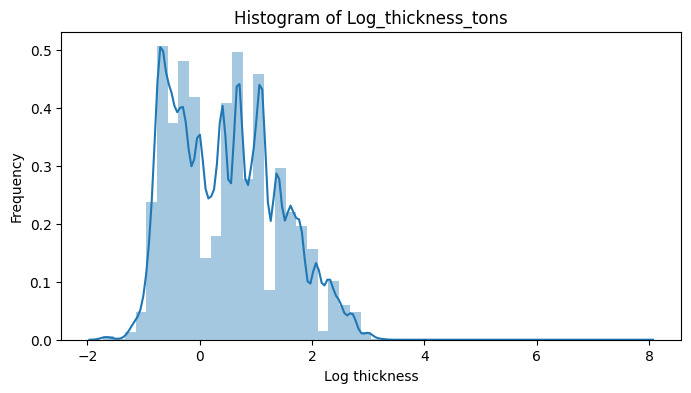

In [20]:
# log transformation to handle skewness
# Apply log transformation
df['log_thickness_tons'] = np.log(df['thickness'])

# Plot transformed data distribution
plt.figure(figsize=(8, 4))
sns.distplot(df['log_thickness_tons'])
plt.title('Histogram of Log_thickness_tons')
plt.xlabel('Log thickness')
plt.ylabel('Frequency')
plt.show()



C:\Users\Jaison Aro\AppData\Local\Temp\ipykernel_15844\410091976.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price'] = df['selling_price'].apply(lambda x: x if x > 0 else np.nan)


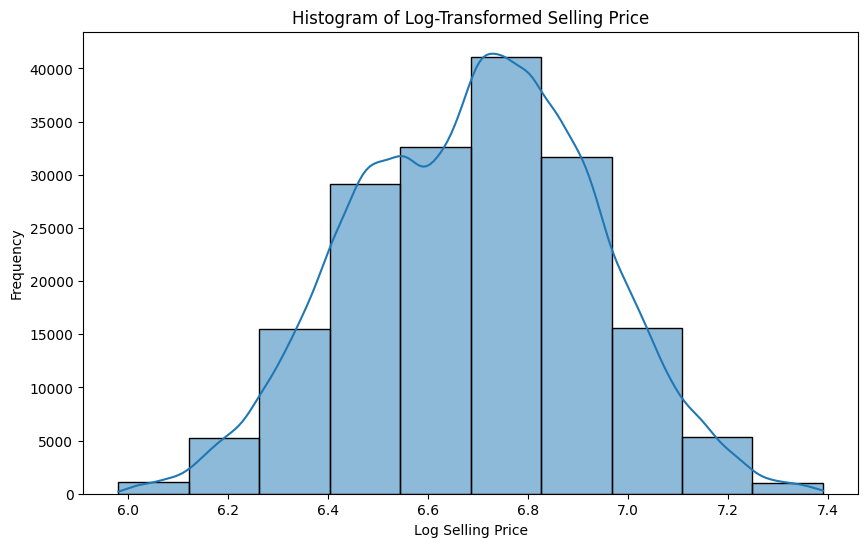

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual data)
# df = ...

# Step 1: Replace zeros and negative values with np.nan
df['selling_price'] = df['selling_price'].apply(lambda x: x if x > 0 else np.nan)

# Step 2: Drop rows with NaN values in 'selling_price'
df = df.dropna(subset=['selling_price'])

# Step 3: Apply log transformation
df['log_selling_price'] = np.log(df['selling_price'])

# Step 4: Detect and remove outliers using IQR
Q1 = df['log_selling_price'].quantile(0.25)
Q3 = df['log_selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Step 5: Filter out outliers
df = df[~((df['log_selling_price'] < (Q1 - 1.5 * IQR)) | (df['log_selling_price'] > (Q3 + 1.5 * IQR)))]

# Step 6: Plot transformed data distribution using histplot
plt.figure(figsize=(10, 6))
sns.histplot(df['log_selling_price'], kde=True, bins=10)
plt.title('Histogram of Log-Transformed Selling Price')
plt.xlabel('Log Selling Price')
plt.ylabel('Frequency')
plt.show()


After transformation

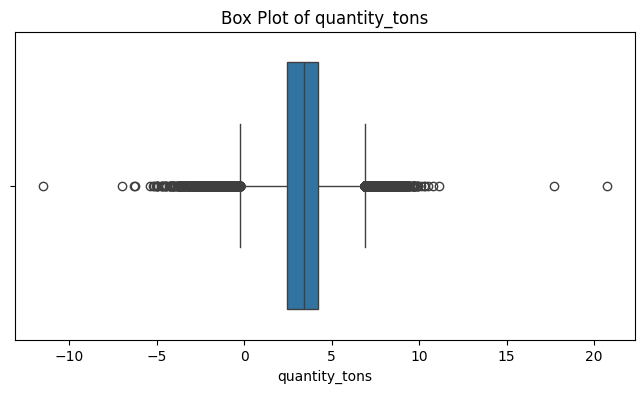

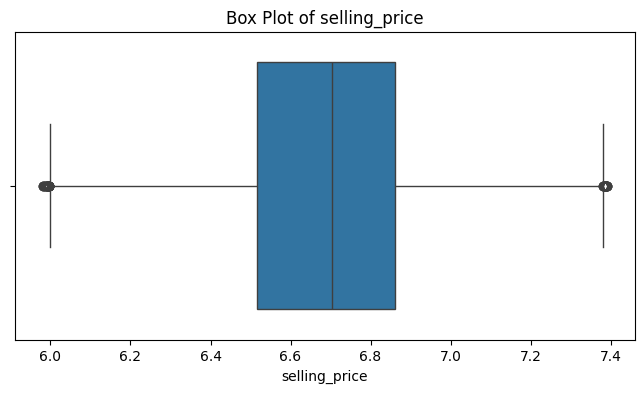

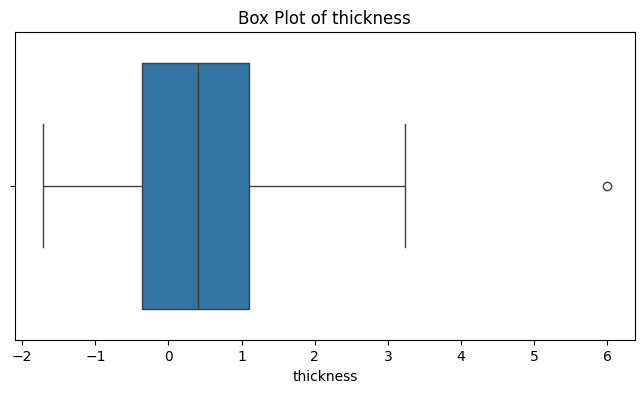

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_quantity_tons'])
plt.title('Box Plot of quantity_tons')
plt.xlabel('quantity_tons')
plt.show()
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_selling_price'])
plt.title('Box Plot of selling_price')
plt.xlabel('selling_price')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_thickness_tons'])
plt.title('Box Plot of thickness')
plt.xlabel('thickness')
plt.show()

In [23]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,log_quantity_tons,log_thickness_tons,log_selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00,NaN,-0.162519,6.398595


In [65]:
# Assuming 'df' is your DataFrame and 'status' is the column name
lost_df = df[df['status'] == 'Lost']
lost_df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,log_quantity_tons,log_thickness_tons,log_selling_price
171,C0BF3187-C4B3-4C63-ABDB-FCB0642A69C0,2021-04-01,8.718789,30223403.0,78.0,Lost,W,10.0,1.00,1500.0,missing,1668701718,2021-07-01,1253.0,2.165480,0.000000,7.133296
174,66D8E20C-AF4A-47D7-8FDD-51DEA6EA1F05,2021-04-01,39.553513,30165992.0,77.0,Lost,S,10.0,1.00,1500.0,FZPA004640,164141591,2021-08-01,1225.0,3.677655,0.000000,7.110696
175,4532B5EF-0446-4880-BC8E-242E89AB8DD6,2021-04-01,11.454558,30223403.0,78.0,Lost,W,10.0,4.00,1500.0,missing,1668701718,2021-07-01,1186.0,2.438388,1.386294,7.078342
176,EE0BA8DE-38E9-4101-ADF9-B7B5B19A3525,2021-04-01,37.655526,30165992.0,77.0,Lost,S,10.0,0.80,1250.0,FZPA004640,164141591,2021-08-01,1249.0,3.628480,-0.223144,7.130099
179,1CDD04C3-6310-431F-B10A-F1C6B4F529DD,2021-04-01,10.291602,30223403.0,78.0,Lost,W,10.0,0.80,1500.0,missing,1668701718,2021-07-01,1284.0,2.331328,-0.223144,7.157735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181527,A30A09D6-6527-4BE3-B2EC-B795F94A70DD,2020-07-02,63.859521,30161559.0,30.0,Lost,S,10.0,5.85,1525.0,missing,640665,2020-08-01,457.0,4.156686,1.766442,6.124683
181529,BD9B7299-6FD2-4A9F-B336-5F677794A03F,2020-07-02,56.028562,30161559.0,30.0,Lost,S,10.0,7.85,1500.0,missing,640665,2020-08-01,458.0,4.025862,2.060514,6.126869
181531,BF93A919-5970-428F-9467-7A2D0573C5C6,2020-07-02,206.224110,30161559.0,30.0,Lost,S,10.0,3.85,1830.0,missing,640665,2020-08-01,460.0,5.328963,1.348073,6.131226
181533,FA54AED7-360E-4DED-96AA-F69D127267B8,2020-07-02,102.993849,30198408.0,25.0,Lost,S,10.0,1.40,1150.0,missing,1668701718,2020-07-01,725.0,4.634669,0.336472,6.586172


In [66]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'log_quantity_tons',
       'log_thickness_tons', 'log_selling_price'],
      dtype='object')

In [67]:
df_dropna = df.dropna()

In [68]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,log_quantity_tons,log_thickness_tons,log_selling_price
count,178203,1.782030e+05,1.782030e+05,178203.000000,178203.000000,178203.000000,178203.000000,1.782030e+05,178203.000000,178200.000000,178203.000000,178203.000000
mean,2020-11-26 09:47:34.679214080,5.988267e+03,3.023276e+07,44.809627,25.502287,2.567932,1296.188821,4.784503e+08,829.004458,3.403317,0.488656,6.692064
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,396.000000,-11.512925,-1.714798,5.981414
25%,2020-09-28 00:00:00,1.134655e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.281170e+05,676.000000,2.428968,-0.356675,6.516193
50%,2020-11-30 00:00:00,3.049878e+01,3.020531e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,816.000000,3.417713,0.405465,6.704414
75%,2021-02-03 00:00:00,6.767225e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,955.365000,4.214698,1.098612,6.862093
max,2021-04-01 00:00:00,1.000000e+09,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,1620.000000,20.723266,5.991465,7.390181
std,NaN,2.371835e+06,1.009649e+05,24.396428,17.756327,2.988900,261.530200,7.197379e+08,197.420291,1.442499,0.932259,0.238183


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178203 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  178203 non-null  object        
 1   item_date           178203 non-null  datetime64[ns]
 2   quantity tons       178203 non-null  float64       
 3   customer            178203 non-null  float64       
 4   country             178203 non-null  float64       
 5   status              178203 non-null  object        
 6   item type           178203 non-null  object        
 7   application         178203 non-null  float64       
 8   thickness           178203 non-null  float64       
 9   width               178203 non-null  float64       
 10  material_ref        178203 non-null  object        
 11  product_ref         178203 non-null  int64         
 12  delivery date       178203 non-null  object        
 13  selling_price       178203 non-nul

In [25]:
# Assuming X is your input DataFrame containing NaN values

# Remove rows with NaN values
df = df.dropna()

# Now X_cleaned does not contain any rows with NaN values


MODEL BUILDING WITH DECISON TREE REGRESSOR

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
target = df['log_selling_price'].values

# Define the features
features = df[['log_quantity_tons', 'status', 'item type', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define column indices for categorical and numerical features
categorical_features = ['status', 'item type']
numerical_features = ['log_quantity_tons', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


# Define the pipeline with XGBoost Regressor
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Define the parameter distribution for RandomizedSearchCV
param_distributions_xgb = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'regressor__max_depth': [3, 4, 5, 6, 7],
    'regressor__min_child_weight': [1, 2, 3, 4, 5],
    'regressor__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=pipeline_xgb,
    param_distributions=param_distributions_xgb,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters for XGBoost with RandomizedSearchCV: {random_search_xgb.best_params_}")

# Predict on the test set
y_pred_xgb_rs = random_search_xgb.predict(X_test)

# Calculate and print the RMSE
rmse_xgb_rs = np.sqrt(mean_squared_error(y_test, y_pred_xgb_rs))
print(f"Root Mean Squared Error for XGBoost with RandomizedSearchCV: {rmse_xgb_rs}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost with RandomizedSearchCV: {'regressor__subsample': 1.0, 'regressor__n_estimators': 500, 'regressor__min_child_weight': 1, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.3, 'regressor__colsample_bytree': 0.8}
Root Mean Squared Error for XGBoost with RandomizedSearchCV: 0.13827641229446289


In [29]:
import pickle

# Serialize the model to a file
with open('random_search_xgb_model.pkl', 'wb') as file:
    pickle.dump(random_search_xgb, file)

print("Model saved as 'random_search_xgb_model.pkl'")


Model saved as 'random_search_xgb_model.pkl'


In [30]:
# Load the model from a file
with open('random_search_xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# You can now use loaded_model to make predictions or inspect it
y_loaded_pred = loaded_model.predict(X_test)
loaded_rmse = np.sqrt(mean_squared_error(y_test, y_loaded_pred))
print(f"Predictions from loaded model: {y_loaded_pred}")
print(f"RMSE from loaded model: {loaded_rmse}")


Predictions from loaded model: [6.7241154 7.001244  6.827611  ... 6.151541  6.589612  6.8035254]
RMSE from loaded model: 0.13827641229446289


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor


target = df['log_selling_price'].values

# Define the features
features = df[['log_quantity_tons', 'status', 'item type', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define column indices for categorical and numerical features
categorical_features = ['status', 'item type']
numerical_features = ['log_quantity_tons', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'regressor__max_depth': 7, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10}
Root Mean Squared Error: 0.1783189840913191


In [72]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) score: {r2}")

Mean Absolute Error (MAE): 0.15096481205687592
R-squared (R2) score: 0.4450275670713596


In [28]:
# Assuming the column order is preserved, prepare a sample input as a DataFrame
sample_input = pd.DataFrame({
    'log_quantity_tons': [3.991779],
    'status': ['Won'],
    'item type': ['W'],
    'application': [10.0],
    'log_thickness_tons': [0.693147],
    'width': [1500.0],
    'product_ref': [1670798778],
    'customer': [30156308.0],
    'country': [28.0]
})

# Use the trained model to predict the selling price for the sample input
predicted_selling_price = random_search_xgb.predict(sample_input)

print(f"Predicted selling price: {predicted_selling_price[0]}")


Predicted selling price: 6.5892744064331055


In [74]:
df_1=df[df['status'].isin(['Won','Lost'])]
len(df_1)

150232

Decision tree classifier

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from imblearn.over_sampling import SMOTE
import pickle  # Ensure pickle is imported here

# Assume df_1 is your DataFrame defined elsewhere
features = df_1[['log_quantity_tons', 'log_selling_price', 'item type', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']]
target = df_1['status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define transformers
categorical_features = ['item type']
numerical_features = ['log_quantity_tons', 'log_selling_price', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline with SMOTE
pipeline = make_pipeline_imblearn(
    preprocessor,
    SMOTE(random_state=42),
    DecisionTreeClassifier(random_state=42)
)

# Parameters and GridSearchCV
param_grid = {
    'decisiontreeclassifier__max_depth': [3, 5, 7],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Evaluation
y_pred = grid_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
accuracy = class_report['accuracy']

# Output results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy: {accuracy}")

# Save the model
with open('classifier_model.pkl', 'wb') as file:
    pickle.dump({'model': grid_search, 'conf_matrix': conf_matrix, 'class_report': class_report, 'accuracy': accuracy}, file)

print("Model and metrics saved to classifier_model.pkl")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Confusion Matrix:
[[ 5240  1661]
 [ 5516 17630]]
Classification Report:
              precision    recall  f1-score   support

        Lost       0.49      0.76      0.59      6901
         Won       0.91      0.76      0.83     23146

    accuracy                           0.76     30047
   macro avg       0.70      0.76      0.71     30047
weighted avg       0.82      0.76      0.78     30047

Accuracy: 0.7611408792891137
Model and metrics saved to classifier_model.pkl


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import pickle  # Ensure pickle is imported

# Assume df_1 is your DataFrame defined elsewhere
# Example DataFrame (df_1) for context
# df_1 = pd.read_csv('your_dataset.csv')  # Load your actual dataset here

features = df_1[['log_quantity_tons', 'log_selling_price', 'item type', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']]
target = df_1['status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define transformers
categorical_features = ['item type']
numerical_features = ['log_quantity_tons', 'log_selling_price', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline with Gradient Boosting
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]
)

# Parameters and GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Evaluation
y_pred = grid_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
accuracy = class_report['accuracy']

# Output results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy: {accuracy:.2f}")

# Save the model
with open('classifier_model.pkl', 'wb') as file:
    pickle.dump({'model': grid_search, 'conf_matrix': conf_matrix, 'class_report': class_report, 'accuracy': accuracy}, file)

print("Model and metrics saved to classifier_model.pkl")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

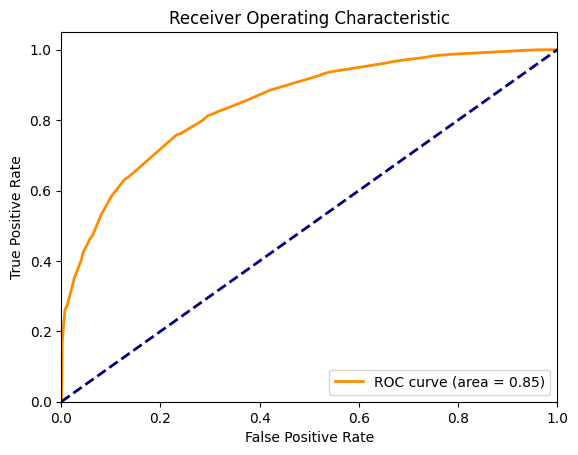

ROC AUC: 0.85


In [40]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
# After the model has been trained and tested
probs = grid_search.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label='Won')  # Ensure the positive label is correctly specified
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Output the AUC
print(f"ROC AUC: {roc_auc:.2f}")



DECISON TREE CLASSIFIER

In [130]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, confusion_matrix
# import pickle

# # Example DataFrame with a small dataset


# # Define the features and target
# features = df_1[['log_quantity_tons','log_selling_price', 'item type', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']]
# target = df_1['status']

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Define column indices for categorical and numerical features
# categorical_features = ['item type']
# numerical_features = ['log_quantity_tons','log_selling_price', 'application', 'log_thickness_tons', 'width', 'product_ref', 'customer', 'country']

# # Create a column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ]
# )

# # Define the pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', DecisionTreeClassifier(random_state=42))
# ])

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'classifier__max_depth': [3, 5, 7],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

# # Initialize GridSearchCV with a reduced number of splits
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print(f"Best parameters: {grid_search.best_params_}")

# # Predict on the test set
# y_pred = grid_search.predict(X_test)

# # Calculate metrics
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
# accuracy = class_report['accuracy']

# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(classification_report(y_test, y_pred, zero_division=0))
# print(f"Accuracy: {accuracy}")

# # Save the model and metrics to a pickle file
# with open('classifier_model.pkl', 'wb') as file:
#     pickle.dump({'model': grid_search, 'conf_matrix': conf_matrix, 'class_report': class_report, 'accuracy': accuracy}, file)

# print("Model and metrics saved to classifier_model.pkl")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Confusion Matrix:
[[ 3077  3824]
 [  956 22190]]
Classification Report:
              precision    recall  f1-score   support

        Lost       0.76      0.45      0.56      6901
         Won       0.85      0.96      0.90     23146

    accuracy                           0.84     30047
   macro avg       0.81      0.70      0.73     30047
weighted avg       0.83      0.84      0.82     30047

Accuracy: 0.8409158984257996
Model and metrics saved to classifier_model.pkl


In [131]:
sample_input = pd.DataFrame({
    'log_quantity_tons': [np.log(108.8598 + 1)],  # example conversion to log scale
    'log_selling_price': [np.log(1175 + 1)],  # example conversion to log scale
    'item type': ['S'],  # assuming categorical, needs encoding if the model expects it
    'application': [41.0],
    'log_thickness_tons': [np.log(1.2+ 1)],  # example conversion to log scale
    'width': [1200.0],
    'product_ref': [1670798778],
    'customer': [30218233],
    'country': [39]
})
# Assuming 'model' is already loaded and is the trained classifier
predicted_status = grid_search.predict(sample_input)

print(f"Predicted Status: {predicted_status[0]}")


Predicted Status: Won


In [142]:
df_1['status'].value_counts()

status
Won     115817
Lost     34415
Name: count, dtype: int64

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model and metrics
with open('classifier_model.pkl', 'rb') as file:
    data = pickle.load(file)
    model = data['model']  # Load the model
    conf_matrix = data['conf_matrix']  # Load the confusion matrix
    accuracy = data['accuracy']  # Load the accuracy
    class_report = data['class_report']  # Load the classification report

# Define the input fields
st.title('Status Classification App')

# User input fields for original (non-log-transformed) values
selling_price = st.number_input('Selling Price', min_value=0.01, format="%.2f")
quantity_tons = st.number_input('Quantity Tons', min_value=0.01, format="%.4f")
item_type = st.selectbox('Item Type', ['W', 'L', 'S'])
application = st.number_input('Application', min_value=0.01, format="%.2f")
thickness_tons = st.number_input('Thickness Tons', min_value=0.01, format="%.4f")
width = st.number_input('Width', min_value=1.0, format="%.0f")
product_ref = st.number_input('Product Ref', min_value=1.0, format="%.0f")
customer = st.number_input('Customer', min_value=1.0, format="%.0f")
country = st.number_input('Country', min_value=1.0, format="%.0f")

# Convert user inputs to log-transformed values to match the model's training data
log_selling_price = np.log(selling_price)
log_quantity_tons = np.log(quantity_tons)
log_thickness_tons = np.log(thickness_tons)

# Create a DataFrame from log-transformed user inputs
input_data = pd.DataFrame({
    'log_selling_price': [log_selling_price],
    'log_quantity_tons': [log_quantity_tons],
    'item type': [item_type],
    'application': [application],
    'log_thickness_tons': [log_thickness_tons],
    'width': [width],
    'product_ref': [product_ref],
    'customer': [customer],
    'country': [country]
})

# Predict button
if st.button('Predict'):
    st.write("Input data being used for prediction:")
    st.write(input_data)  # Display the data being input to the model
    prediction = model.predict(input_data)
    st.write(f'Predicted Status: {prediction[0]}')

    # Display confusion matrix
    st.subheader('Confusion Matrix')
    fig, ax = plt.subplots()
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    st.pyplot(fig)

    # Display accuracy
    st.subheader('Accuracy')
    st.write(f"Accuracy: {accuracy:.2f}%")

    # Display detailed classification metrics
    st.subheader('Classification Report')
    st.text(class_report)
